In [1]:
# Importar as bibliotecas.
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import statsmodels.api as sm
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image

C:\Users\danny\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Importar o ficheiro que contém a informação dos países presentes na base de dados, e que contém 2 colunas que serão utilizadas no decorrer do trabalho (Region e IncomeGroup).
metadata = pd.read_csv('Metadata_Country_API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_511370.csv')
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


In [3]:
# Verificar a  quantidade de linhas e colunas.
metadata.shape

(263, 6)

In [4]:
# Dividir o ficheiro metadata, de modo a reter as colunas pretendidas.
dataframe = metadata.iloc[:,0:3]
dataframe.head()

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [5]:
# Criar uma lista com todos os ficheiros CSV a serem considerados na análise. Os ficheiros devem estar guardados na mesma pasta que o Jupyter Notebook.

inputfiles = [f for f in listdir(os.getcwd()) if (f.endswith(".csv") and f.startswith("A")) if isfile(join(os.getcwd(), f))]

# Iniciar as variáveis em que os DataFrames serão armazenados.

df0, df1=[0]*len(inputfiles), [0]*len(inputfiles)

# Deixar o utilizador decidir o ano para o qual a análise será realizada.

user_yr=int(input("Qual é o ano que deseja analisar? "))

#Loop
for f in inputfiles:
    # Ler o conteúdo dos ficheiros na lista df0.
    df0[inputfiles.index(f)]=pd.read_csv(f, skiprows=4)
    # Os ficheiros contêm dados que duram quase 60 anos. A variável seguinte determina a coluna, do ficheiro, que possui os dados correspondentes ao ano escolhido.
    i_yr=user_yr-1960-(len(df0[inputfiles.index(f)].columns)-4)
    # Criar um novo DataFrame com as colunas relevantes para a análise - mantivemos o código do país (para poder encontrar uma correspondência entre todos os dicheiros) e o nome de cada indicador (para nomear a coluna correta e automaticamente).
    df1[inputfiles.index(f)] = df0[inputfiles.index(f)].iloc[:,[1,2,i_yr]]
    # Renomear a coluna que contêm a data, em df1, pelo indicador.
    df1[inputfiles.index(f)] = df1[inputfiles.index(f)].rename(columns={df1[inputfiles.index(f)].columns[2]: df1[inputfiles.index(f)].iloc[0,1]})
    # Eliminar a coluna cujo nome é "Indicator".
    df1[inputfiles.index(f)] = df1[inputfiles.index(f)].loc[:, ~df1[inputfiles.index(f)].columns.str.startswith('Indicator')]

Qual é o ano que deseja analisar?  2017


In [6]:
# Juntar todos os dados, para o ano escolhido, num único DataFrame. Esta ação é feita através da variável "Country Code" para que exista uma correnpondência entre todos os ficheiros.
df=df1[0]
for i in range(1,len(df1)):
    df=pd.merge(df1[i], df, how='left',left_on='Country Code', right_on='Country Code')
df.head()

,Country Code,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Gross savings (% of GDP),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Expense (% of GDP),"Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)"
0,ABW,76.010,NaN,NaN,25630.266492,1.330511,75.237898,70.810923,NaN,-0.481315,6.015722
1,AFG,64.130,49.5,20.790795,556.302139,2.665292,45.332065,5.904816,36.652642,4.975952,0.255222
2,AGO,60.379,53.4,26.437205,4095.812942,-0.147207,23.252721,29.004100,16.671137,31.691686,-6.057209
3,ALB,78.333,8.0,16.428251,4532.889198,3.836620,46.604676,31.556653,23.857810,1.993928,7.852230
4,AND,NaN,2.8,NaN,39134.393371,1.724022,NaN,NaN,NaN,NaN,NaN


In [7]:
# Verificar a quantidade de linhas e colunas para o ano escolhido.
df.shape

(264, 11)

In [8]:
# Visualizar um país, neste caso, França. 
df.loc[df['Country Code'] == "FRA"]

,Country Code,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Gross savings (% of GDP),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Expense (% of GDP),"Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)"
75,FRA,82.52439,3.4,22.73704,38679.127148,2.260203,31.878166,30.819895,47.511637,1.032283,1.451468


In [9]:
# Montar a estrutura da tabela de objetos (left): Country Name, Country Code, Region, IncomeGroup.
dataframe = pd.merge(dataframe,df, how='left',left_on='Country Code', right_on='Country Code')
dataframe.tail()

,Country Code,Region,IncomeGroup,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Gross savings (% of GDP),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Expense (% of GDP),"Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)"
258,XKX,Europe & Central Asia,Upper middle income,71.946341,NaN,23.396918,3948.088150,4.227909,52.532780,26.649932,NaN,1.488234,4.497178
259,YEM,Middle East & North Africa,Low income,66.086000,42.9,NaN,963.494721,-5.942320,NaN,NaN,NaN,NaN,-1.006201
260,ZAF,Sub-Saharan Africa,Upper middle income,63.538000,29.6,16.144718,6127.462297,1.414513,28.346226,29.627669,34.416834,5.181082,0.589766
261,ZMB,Sub-Saharan Africa,Lower middle income,63.043000,41.5,NaN,1534.865371,3.403169,33.793711,35.151981,20.808263,6.577312,3.347373
262,ZWE,Sub-Saharan Africa,Lower middle income,60.812000,35.4,-3.370166,1602.403507,4.704035,29.342905,18.993548,26.596372,0.909733,1.083538


In [10]:
# Eliminar as linhas que contêm erros, ou dados omissos, nalguma das variáveis.
dataframe=dataframe.dropna()
dataframe.head()

,Country Code,Region,IncomeGroup,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Gross savings (% of GDP),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Expense (% of GDP),"Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)"
1,AFG,South Asia,Low income,64.130000,49.5,20.790795,556.302139,2.665292,45.332065,5.904816,36.652642,4.975952,0.255222
2,AGO,Sub-Saharan Africa,Lower middle income,60.379000,53.4,26.437205,4095.812942,-0.147207,23.252721,29.004100,16.671137,31.691686,-6.057209
3,ALB,Europe & Central Asia,Upper middle income,78.333000,8.0,16.428251,4532.889198,3.836620,46.604676,31.556653,23.857810,1.993928,7.852230
8,ARM,Europe & Central Asia,Upper middle income,74.797000,11.6,17.394783,3914.501268,7.500000,49.500644,37.329509,22.629725,0.969553,2.176847
11,AUS,East Asia & Pacific,High income,82.497561,3.1,21.845556,54093.602191,2.342582,20.565970,21.180927,26.558561,1.948647,3.260800


In [11]:
# Verificar a quantidade de linhas e colunas, após a eliminação das linhas.
dataframe.shape

(101, 13)

In [12]:
# Visualizar os ultimos registos.
dataframe.tail(4)

,Country Code,Region,IncomeGroup,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Gross savings (% of GDP),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Expense (% of GDP),"Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)"
248,USA,North America,High income,78.539024,5.7,19.010388,59927.929834,2.217010,15.029699,12.061214,22.378301,2.130110,1.820076
250,VCT,Latin America & Caribbean,Upper middle income,72.300000,15.3,9.169244,7149.630866,0.859946,55.234324,35.231058,26.584114,2.153336,12.498318
260,ZAF,Sub-Saharan Africa,Upper middle income,63.538000,29.6,16.144718,6127.462297,1.414513,28.346226,29.627669,34.416834,5.181082,0.589766
262,ZWE,Sub-Saharan Africa,Lower middle income,60.812000,35.4,-3.370166,1602.403507,4.704035,29.342905,18.993548,26.596372,0.909733,1.083538


In [13]:
# Renumerar o indice do dataframe.
dataframe = dataframe.reset_index(drop=True)
dataframe.head(3)

,Country Code,Region,IncomeGroup,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Gross savings (% of GDP),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Expense (% of GDP),"Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)"
0,AFG,South Asia,Low income,64.130,49.5,20.790795,556.302139,2.665292,45.332065,5.904816,36.652642,4.975952,0.255222
1,AGO,Sub-Saharan Africa,Lower middle income,60.379,53.4,26.437205,4095.812942,-0.147207,23.252721,29.004100,16.671137,31.691686,-6.057209
2,ALB,Europe & Central Asia,Upper middle income,78.333,8.0,16.428251,4532.889198,3.836620,46.604676,31.556653,23.857810,1.993928,7.852230


In [14]:
# Verificar o tipo das variáveis presente no dataframe.
dataframe.dtypes

Country Code                                          object
Region                                                object
IncomeGroup                                           object
Life expectancy at birth, total (years)              float64
Mortality rate, infant (per 1,000 live births)       float64
Gross savings (% of GDP)                             float64
GDP per capita (current US$)                         float64
GDP growth (annual %)                                float64
Imports of goods and services (% of GDP)             float64
Exports of goods and services (% of GDP)             float64
Expense (% of GDP)                                   float64
Inflation, consumer prices (annual %)                float64
Foreign direct investment, net inflows (% of GDP)    float64
dtype: object

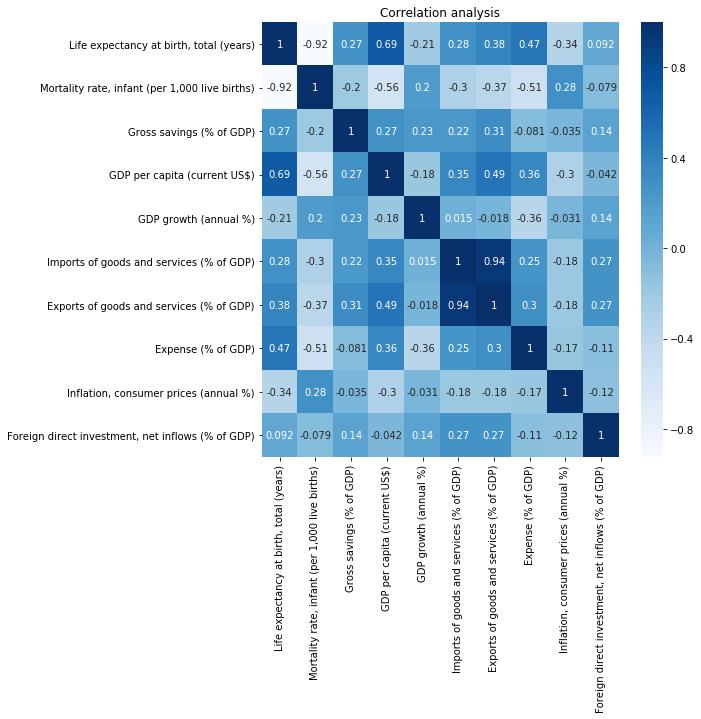

In [15]:
# Verificar a correlação entre as variáveis presentes no dataframe.
fig = plt.figure(figsize=[8, 8])
corr_mtx = dataframe.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [16]:
# Eliminar variáveis indejadas, caso existam, devido à elevada correlação. Responder "Não" caso não deseje executar uma eliminação e "Sim" no caso de desejar.
a=input("Gostaria de eliminar alguma variável do dataframe? ")
if a=="Não":
    print("OK!")
elif a=="Sim":
    b=input("Qual é o nome da coluna que deseja eliminar? ")
    dataframe1=dataframe.drop(b,axis=1)
    dataframe1.head()
else:
    print("Tente outra vez!")

Gostaria de eliminar alguma variável do dataframe?  Sim
Qual é o nome da coluna que deseja eliminar?  Exports of goods and services (% of GDP)


In [17]:
# Definir a variável dependente.
Y = dataframe1.loc[:,'GDP per capita (current US$)']

In [18]:
# Definir as variáveis explicativas.
X = dataframe1.drop(['Country Code','Region', 'IncomeGroup', 'GDP per capita (current US$)'], axis=1)

In [19]:
# Regresão em que a variável dependente é "GDP per capita (current US$)" e as restantes variáveis são as explicativas.
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

C:\Users\danny\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.582
Model:                                      OLS   Adj. R-squared:                  0.545
Method:                           Least Squares   F-statistic:                     16.00
Date:                          Tue, 10 Dec 2019   Prob (F-statistic):           1.46e-14
Time:                                  15:08:11   Log-Likelihood:                -1107.9
No. Observations:                           101   AIC:                             2234.
Df Residuals:                                92   BIC:                             2257.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              -2.59e+05   4.75e+04     -5.458      0.000   -3.53e+05   -1.65e+05
Life expectancy at birth, total (years)            3408.4078    584.549      5.831      0.000    2247.443    4569.373
Mortality rate, infant (per 1,000 live births)      798.8018    254.195      3.142      0.002     293.949    1303.655
Gross savings (% of GDP)                            210.1050    196.026      1.072      0.287    -179.220     599.430
GDP growth (annual %)                              -410.4735    678.720     -0.605      0.547   -1758.471     937.524
Imports of goods and services (% of GDP)            179.4732     62.334      2.879      0.005      55.673     303.273
Expense (% of GDP)                                  100.3535    198.544      0.505      0.614    -293.972     494.679
Inflation, consumer prices (annual %)              -343.6026    398.587     -0.862      0.391   -1135.230     448.025
Foreign direct investment, net inflows (% of GDP)  -568.1845    250.354     -2.270      0.026   -1065.410     -70.959
==============================================================================
Omnibus:                       10.881   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.203
Skew:                           0.793   Prob(JB):                      0.00369
Kurtosis:                       3.382   Cond. No.                     3.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Qual é a variável com maior coeficente?  Life expectancy at birth, total (years)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


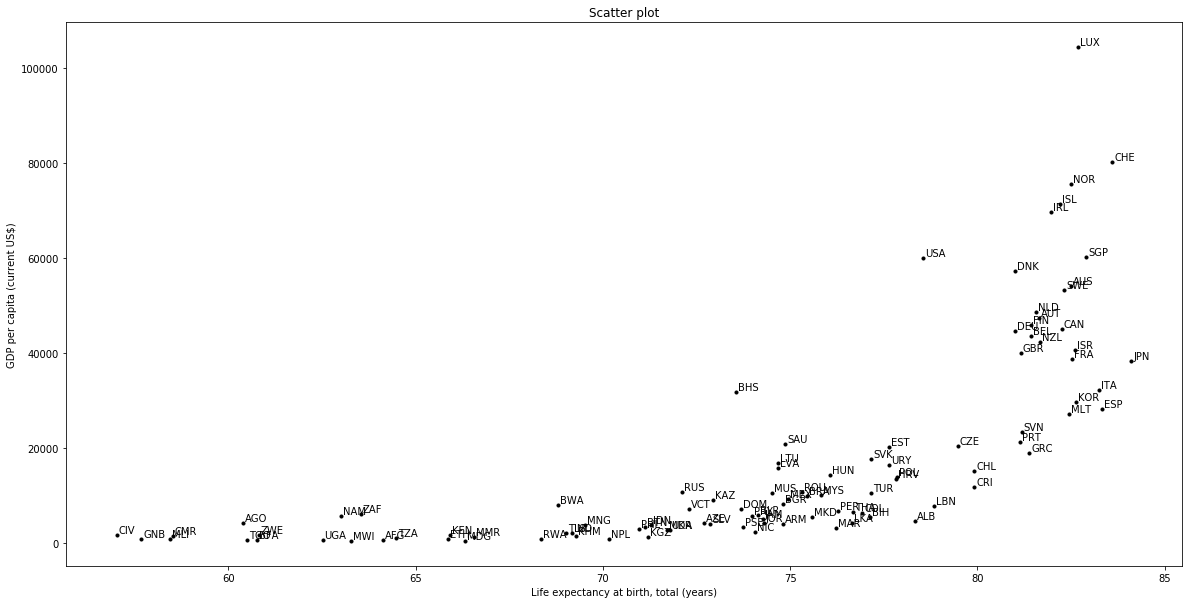

In [21]:
# Criar scatterplot para a relação entre o GDP per capita e a variável com um maior impacto.
i=input("Qual é a variável com maior coeficente? ")
ydata = Y
xdata = X.loc[:,i]
colors = (0,0,0)
area = np.pi*3
fig = plt.figure(figsize=(20,10))
plt.scatter(
    xdata, 
    ydata, 
    s = area, 
    c = colors, 
    alpha = 1)

for label, x, y in zip(dataframe.iloc[:,0], xdata, ydata):
    plt.annotate(
        label,
        xy=(x, y), xytext=(2, 0),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
    

plt.title('Scatter plot')
plt.xlabel(i)
plt.ylabel('GDP per capita (current US$)')
plt.show()

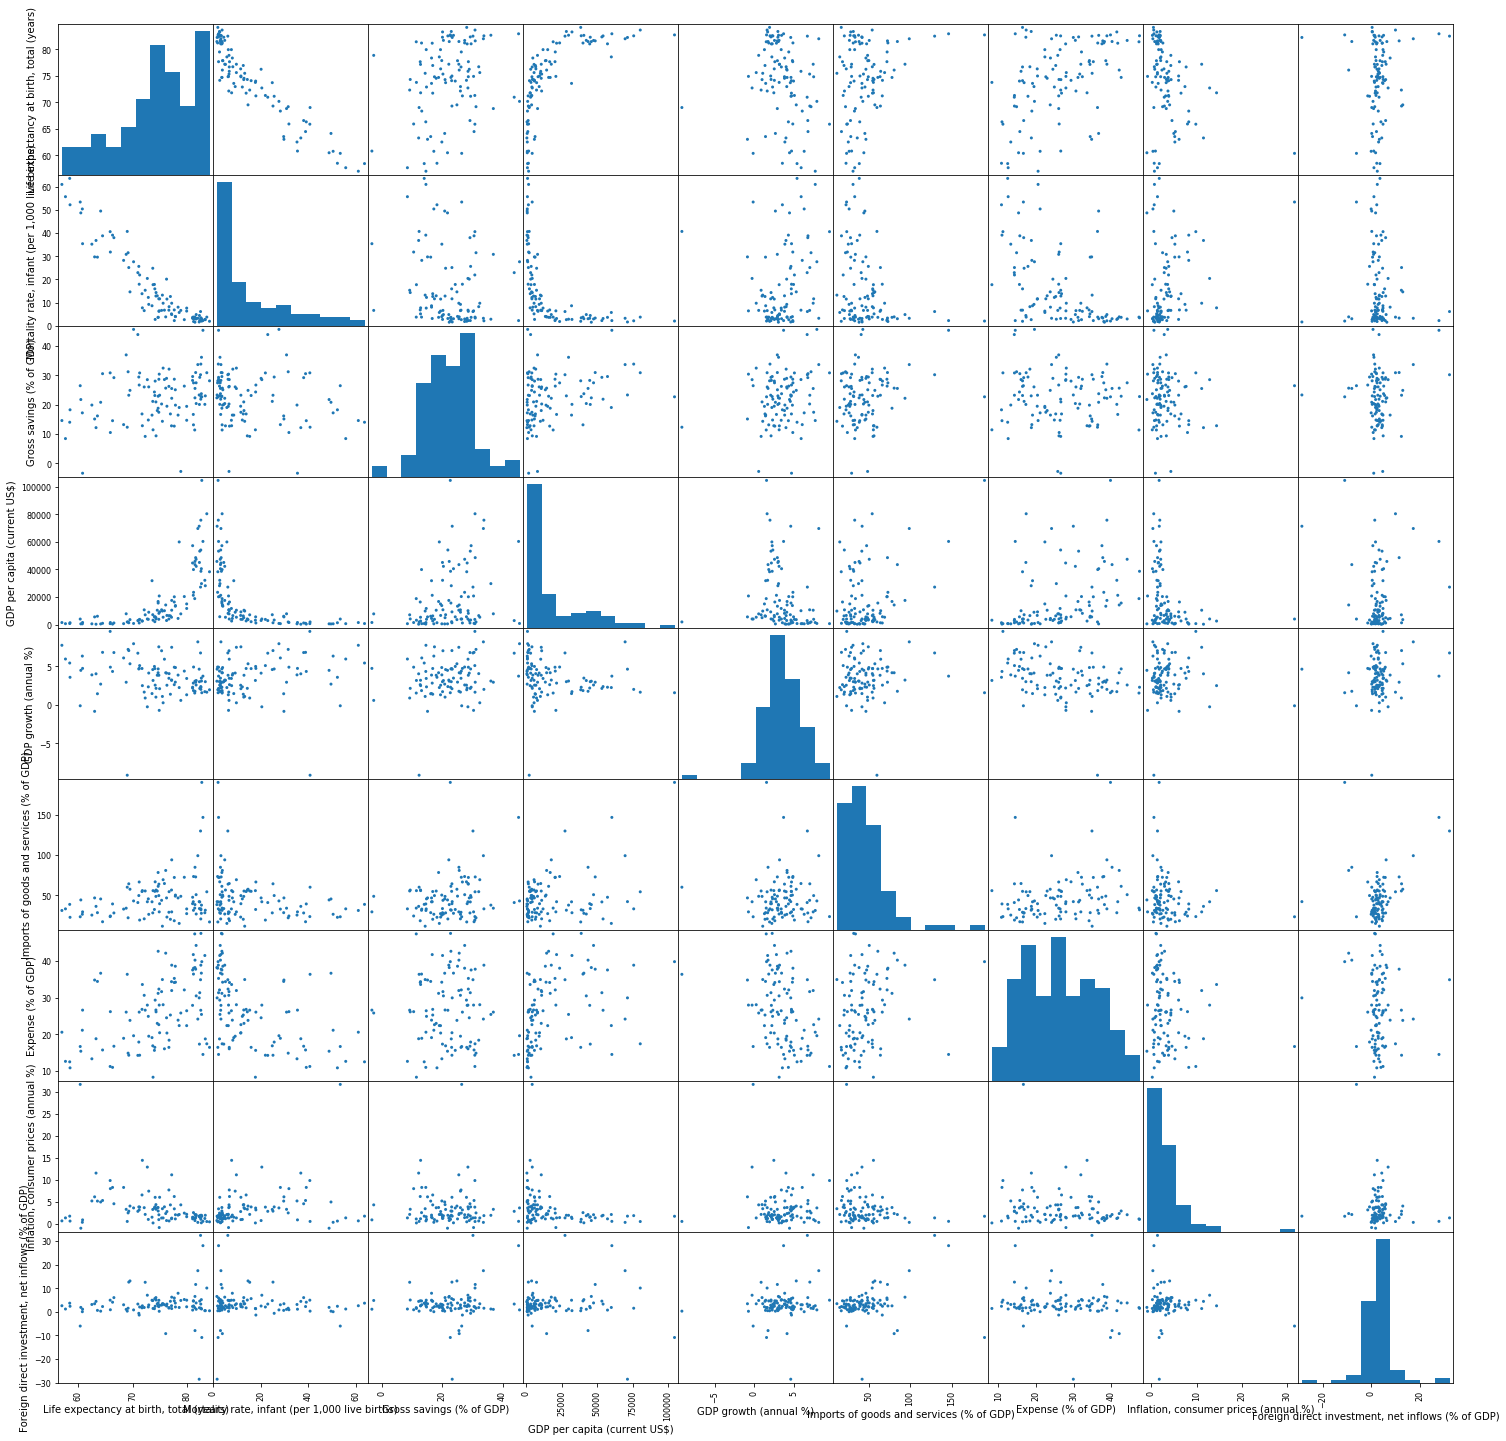

In [22]:
# Criar uma scatter matrix para analisar a relação, dois a dois, das variáveis.
stats = dataframe1.columns[3:]
corr = dataframe1[stats].corr() # corr é utilizado para encontrar a correlação.
color_function = {0: 'blue', 1: 'red'}
colors = dataframe1['GDP per capita (current US$)'].map(lambda x: color_function.get(x))
scatter_matrix(dataframe1[stats], alpha = 1, figsize = (25, 25))
plt.show()

In [23]:
# Dividir o dataframe para ficar apenas com os valores e os índices.
dataframe2 = dataframe.iloc[:,3:]
dataframe2.head()

,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Gross savings (% of GDP),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Expense (% of GDP),"Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)"
0,64.130000,49.5,20.790795,556.302139,2.665292,45.332065,5.904816,36.652642,4.975952,0.255222
1,60.379000,53.4,26.437205,4095.812942,-0.147207,23.252721,29.004100,16.671137,31.691686,-6.057209
2,78.333000,8.0,16.428251,4532.889198,3.836620,46.604676,31.556653,23.857810,1.993928,7.852230
3,74.797000,11.6,17.394783,3914.501268,7.500000,49.500644,37.329509,22.629725,0.969553,2.176847
4,82.497561,3.1,21.845556,54093.602191,2.342582,20.565970,21.180927,26.558561,1.948647,3.260800


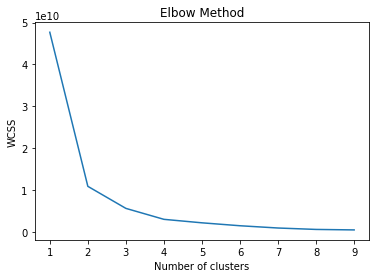

In [23]:
# Aplicar o Metodo Elbow para encontrar o número de clusters a considerar na análise.
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3000, n_init=10, random_state=0)
    kmeans.fit(dataframe2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# Definir o número de clusters que serão considerdados na análise.
clus_num = int(input("De acordo com o método Elbow, quantos Clusters quer considerar na sua análise? "))
kmeans = KMeans(n_clusters = clus_num).fit(dataframe2)
centroids = kmeans.cluster_centers_
print(centroids)

De acordo com o método Elbow, quantos Clusters quer considerar na sua análise?  4


[[ 7.87729512e+01  4.17894737e+00  2.27821307e+01  2.09097598e+04
   3.22237393e+00  5.52301896e+01  5.92262010e+01  3.40054494e+01
   2.04637674e+00  3.95165569e+00]
 [ 8.25917073e+01  2.52000000e+00  2.88480794e+01  8.03002179e+04
   3.57837361e+00  8.36067806e+01  9.82714784e+01  3.00296303e+01
   1.24812867e+00 -2.10371627e+00]
 [ 7.03042763e+01  2.36393443e+01  2.09803775e+01  4.40168570e+03
   3.82544699e+00  4.06005797e+01  3.27744532e+01  2.24123645e+01
   4.53345943e+00  3.10201304e+00]
 [ 8.17871921e+01  3.24375000e+00  2.54692762e+01  4.74714111e+04
   2.53666207e+00  4.52820828e+01  4.87257434e+01  3.15918639e+01
   1.44987848e+00  4.29876390e+00]]


In [25]:
pred_y = kmeans.predict(dataframe2)
print(pred_y)

[2 2 2 2 3 3 2 3 2 2 0 2 2 2 2 2 3 1 0 2 2 2 2 0 3 3 2 0 0 2 3 3 3 2 0 0 0
 2 2 1 1 3 0 2 2 3 2 2 2 2 0 2 2 0 1 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 3 1 2 3
 2 2 0 0 2 2 2 2 2 0 3 2 0 0 3 2 2 2 2 2 2 2 0 3 2 2 2]


In [26]:
pred_y.shape

(101,)

In [27]:
# Criar o dataframe com os grupos (Clusters).
groups = pd.DataFrame(pred_y, columns = ['Group'])
groups.head()

,Group
0,2
1,2
2,2
3,2
4,3


In [28]:
# Adicionar a coluna que contém o grupo do país ao dataframe inicial.
dataframe = dataframe.merge(groups,left_index=True, right_index=True)
dataframe.head(2)

,Country Code,Region,IncomeGroup,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Gross savings (% of GDP),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Expense (% of GDP),"Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Group
0,AFG,South Asia,Low income,64.130,49.5,20.790795,556.302139,2.665292,45.332065,5.904816,36.652642,4.975952,0.255222,2
1,AGO,Sub-Saharan Africa,Lower middle income,60.379,53.4,26.437205,4095.812942,-0.147207,23.252721,29.004100,16.671137,31.691686,-6.057209,2


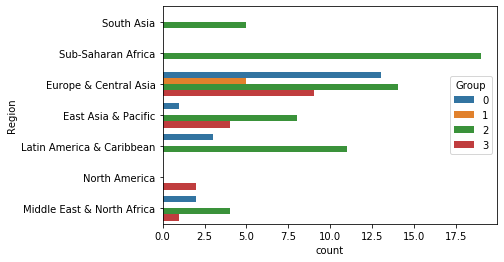

In [29]:
# Exibir o gráfico com a contabilização de quantos países pertencem a cada grupo, por região.
sns.countplot(y='Region', hue = 'Group', data = dataframe)

In [30]:
# Criar um novo data frame para a Decision Tree.
ndataframe = ['Foreign direct investment, net inflows (% of GDP)','Gross savings (% of GDP)','Expense (% of GDP)','GDP per capita (current US$)','Exports of goods and services (% of GDP)','Inflation, consumer prices (annual %)']
# Separar por variaveis.
nx = dataframe.loc[:,ndataframe].values
# Separar o alvo de estudo.
ny = dataframe.loc[:,['IncomeGroup']].values

In [31]:
# Dividir o dataframe entre treino e teste.
nx_train, nx_test, ny_train, ny_test = train_test_split(nx, ny, test_size=0.3, random_state=1)

In [32]:
# Criar o objeto da Decision Tree Classifer.
clf = DecisionTreeClassifier()
# Treinar Decision Tree Classifer.
clf = clf.fit(nx_train,ny_train)
# Prever a resposta para o dataframe de teste.
y_pred1 = clf.predict(nx_test)

In [33]:
# Encontrar a taxa de precisão do modelo.
print("A taxa de precisão do modelo é de:",metrics.accuracy_score(ny_test, y_pred1))

A taxa de precisão do modelo é de: 0.967741935483871


In [ ]:
# Criar o arquivo com a Decision Tree.
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = ndataframe)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('IncomeGroupDT.png')
Image(graph.create_png())